# Word2Vec

Custom word2vec model

In [5]:
import pandas as pd
from gensim.models.word2vec import Word2Vec

In [6]:
master_df = pd.read_pickle("../../dataset/FakeNewsNet/data/FakeNewsNet.pkl")
master_df.head()

,text,processed_text,label
0,On Air with Ryan Seacrest is offering you a ch...,"[air, ryan, seacrest, offer, chance, win, nigh...",false
1,‘American Idol’ final: How to vote for the sea...,"[american, idol, final, vote, season, winner, ...",false
2,@ScottDisick @KrisJenner @khloekardashian — LA...,"[latest, art, shame, revenge, prank, banksy, s...",false
3,@foquinha Youngblood - 5 Seconds of Summer \nO...,"[youngblood, seconds, summer, little, mix, del...",false
4,Kylie Jenner ‘Open’ To Reconciliation With Tyg...,"[kylie, jenner, open, reconciliation, tyga, pr...",false


In [7]:
corpus = master_df['processed_text']
corpus.head()

0    [air, ryan, seacrest, offer, chance, win, nigh...
1    [american, idol, final, vote, season, winner, ...
2    [latest, art, shame, revenge, prank, banksy, s...
3    [youngblood, seconds, summer, little, mix, del...
4    [kylie, jenner, open, reconciliation, tyga, pr...
Name: processed_text, dtype: object

## Custom Word2Vec Model Training

In [4]:
# Total number of word
from functools import reduce

word_count = reduce(lambda acc, cur: len(cur) + acc, corpus.to_list(), 0)

print("total word count: ", word_count)


total word count:  15718897


In [26]:
model = Word2Vec(corpus)


In [27]:
model.save('word2vec_default.model')
model = Word2Vec.load('word2vec_default.model')

In [43]:
# https://www.kaggle.com/code/jerrykuo7727/word2vec
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, word + '_cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [29]:
most_similar(model, ["vote"])

,vote,cos
0,voting,0.730937
1,voteblue,0.628420
2,majority,0.613502
3,nevadans,0.605064
4,dem,0.598913
5,repub,0.595217
6,zec,0.572398
7,democrats,0.569100
8,gerrymandering,0.568503
9,alpha,0.560135


### Training and Tuning

In [30]:
model_500_5 = Word2Vec(corpus, vector_size=500, epochs=5, workers=23)
model_500_5.save('word2vec_500_5.model')

In [31]:
model_500_6 = Word2Vec(corpus, vector_size=500, epochs=6, workers=23)
model_500_6.save('word2vec_500_6.model')

In [32]:
model_500_7 = Word2Vec(corpus, vector_size=500, epochs=7, workers=23)
model_500_7.save('word2vec_500_7.model')

In [33]:
model_500_10 = Word2Vec(corpus, vector_size=500, epochs=10, workers=23)
model_500_10.save('word2vec_500_10.model')

In [34]:
model_500_sg = Word2Vec(corpus, vector_size=500, epochs=5, workers=23)
model_500_sg.save('word2vec_500_sg.model')

In [35]:
model_250 = Word2Vec(corpus, vector_size=250, epochs=7, workers=23)
model_250.save('word2vec_250.model')

In [44]:
keywords =  ["breaking", "apple", "human", "vote", "vehicle", "automobile", "accident"]

In [45]:
most_similar(model_500_5, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,cyprium,0.438846,sist,0.414778,genocide,0.478662,voting,0.597597,truck,0.595775,importer,0.490059,autonews,0.518370
1,buzzybuzz,0.396353,fea,0.403271,being,0.476632,voter,0.490681,car,0.535454,import,0.475862,pools,0.506953
2,exchanges,0.389748,juice,0.400423,humanright,0.470421,dem,0.480006,injure,0.516564,agricultural,0.467864,atv,0.480328
3,urbannews,0.386790,sips,0.368368,compassion,0.434666,majority,0.446229,firearm,0.502517,exporter,0.434066,car,0.461386
4,lfn,0.385020,unifo,0.363856,cultural,0.422674,voteblue,0.438593,fatality,0.488959,dairy,0.431519,crash,0.448197
5,parsian,0.383749,bows,0.360004,decency,0.422284,democrat,0.427908,mph,0.484503,congestion,0.428155,injures,0.443031
6,buzzort,0.383718,yin,0.359512,constitutional,0.414000,gop,0.418695,aircraft,0.482751,cda,0.423500,moped,0.442736
7,zonamya,0.373836,grandkids,0.354171,basic,0.413659,invoke,0.411080,motorcycle,0.482125,subsidy,0.423060,vehicle,0.435666
8,gbeducity,0.366042,pharma,0.348949,flesh,0.409447,senate,0.410664,fatal,0.480547,manufacture,0.411551,windows,0.430211
9,ecig,0.365118,proponent,0.346485,ability,0.403973,progressive,0.410184,helicopter,0.477895,countries,0.407196,explosions,0.428581


In [46]:
most_similar(model_500_6, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,cyprium,0.438765,unifo,0.407911,humanright,0.424982,voting,0.565343,truck,0.600588,importer,0.476606,autonews,0.460482
1,exchanges,0.425253,proponent,0.397072,genocide,0.423291,voter,0.461100,aircraft,0.546105,exporter,0.429371,car,0.447106
2,zonamya,0.388986,sist,0.387693,constitutional,0.417948,voteblue,0.453420,car,0.535701,agricultural,0.422305,pools,0.445424
3,lfn,0.383338,fea,0.387497,violation,0.391130,dem,0.436136,injure,0.522428,subsidy,0.417669,atv,0.435817
4,buzzybuzz,0.379953,pharma,0.387427,being,0.391114,majority,0.427900,mph,0.494518,import,0.413322,windows,0.420839
5,urbannews,0.373283,clp,0.383424,nature,0.389207,ballot,0.421771,motorcycle,0.491752,lng,0.397875,moped,0.409306
6,buzzort,0.369133,bows,0.360795,flesh,0.387000,democrat,0.412886,highway,0.485048,export,0.393936,crash,0.407155
7,parsian,0.367905,politi,0.350024,individual,0.379904,clexa,0.408008,fatality,0.480035,oil,0.387145,injure,0.406814
8,mbeattv,0.363248,juice,0.347571,compassion,0.379107,votethemout,0.405411,firearm,0.472880,dairy,0.385220,explosions,0.378113
9,learnfromnazrul,0.346620,gadget,0.344527,instinct,0.373946,senate,0.391243,fatal,0.472772,electric,0.384615,vehicle,0.371831


In [47]:
most_similar(model_500_7, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,exchanges,0.402608,fea,0.389926,humanright,0.438061,voting,0.580893,truck,0.540383,agricultural,0.401349,autonews,0.456083
1,cyprium,0.398843,proponent,0.385826,being,0.418335,voter,0.496819,aircraft,0.539661,importer,0.383509,pools,0.450549
2,buzzybuzz,0.380102,sist,0.357723,animal,0.414835,votethemout,0.447480,car,0.514922,dairy,0.377713,moped,0.415512
3,lfn,0.359340,unifo,0.352888,flesh,0.388073,voteblue,0.424766,firearm,0.487950,dealers,0.374443,atv,0.413637
4,urbannews,0.353754,pharma,0.350125,genocide,0.364453,dem,0.420408,injure,0.479771,permianbasin,0.373945,explosions,0.412258
5,buzzort,0.351904,grandkids,0.344982,individual,0.362635,majority,0.413487,motorcycle,0.479465,subsidy,0.363483,injures,0.409770
6,learnfromnazrul,0.348481,bows,0.337890,violation,0.362107,clexa,0.412978,fatality,0.476637,hydrocarbon,0.361118,bikes,0.405286
7,zonamya,0.346894,juice,0.337833,empathy,0.360246,ballot,0.409572,helicopter,0.454446,import,0.358634,crash,0.403428
8,loweel,0.341391,clp,0.335093,endanger,0.359814,senate,0.406060,highway,0.451168,industrial,0.357071,autos,0.399652
9,thatvspot,0.339951,politi,0.328487,ability,0.359481,endorse,0.397345,mph,0.448181,textile,0.349790,windows,0.392533


In [48]:
most_similar(model_500_10, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,cyprium,0.369629,proponent,0.364415,animal,0.373092,voting,0.541605,truck,0.501137,agricultural,0.367814,pools,0.447410
1,exchanges,0.365123,fea,0.358999,humanright,0.365547,voter,0.438641,car,0.484013,importer,0.351618,autonews,0.444974
2,buzzort,0.331905,sist,0.357783,cosmic,0.348589,dem,0.422526,aircraft,0.462346,natga,0.335170,atv,0.427583
3,buzzybuzz,0.325596,clp,0.349696,flesh,0.345863,voteblue,0.416817,taxi,0.441170,import,0.334623,moped,0.423455
4,urbannews,0.325243,juice,0.345103,being,0.343717,ballot,0.383174,fatality,0.434335,transmission,0.322513,bikes,0.402245
5,lfn,0.324584,bows,0.335204,endanger,0.337704,votethemout,0.370693,motorcycle,0.431921,shipment,0.317921,injures,0.390677
6,loweel,0.322772,pharma,0.327855,genocide,0.329769,senate,0.365657,firearm,0.427454,naturalga,0.317157,explosions,0.388592
7,zonamya,0.318980,unifo,0.326663,compassion,0.328799,republicans,0.363954,bmw,0.421080,subsidy,0.317024,autos,0.382975
8,stockmarket,0.308371,grandkids,0.308168,sentient,0.327535,wynonnaearp,0.361249,highway,0.420272,vw,0.313064,injure,0.358025
9,xxlmag,0.307972,gadget,0.306711,creature,0.324344,democrats,0.359308,helicopter,0.412836,permianbasin,0.308011,windows,0.350614


In [49]:
most_similar(model, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,exchanges,0.501109,juice,0.468137,being,0.694209,voting,0.730937,truck,0.672313,subsidy,0.609324,car,0.571244
1,cyprium,0.489486,iheart,0.437475,humanright,0.636066,voteblue,0.628420,firearm,0.628374,lucrative,0.596859,pools,0.556012
2,ecig,0.460326,chunk,0.431827,capable,0.620983,majority,0.613502,aircraft,0.620707,importer,0.596707,autonews,0.551615
3,dubstep,0.448581,shoutout,0.429998,decency,0.594879,nevadans,0.605064,fatality,0.601116,manufacture,0.592591,injure,0.546400
4,buzzort,0.443079,headphone,0.429577,unnecessary,0.584280,dem,0.598913,airline,0.599643,agricultural,0.586725,vehicle,0.515621
5,yahoo,0.441904,unifo,0.427510,possess,0.565006,repub,0.595217,car,0.597105,agri,0.576117,crash,0.514158
6,learnfromnazrul,0.439710,tremendously,0.426781,trafficker,0.557755,zec,0.572398,bmw,0.588196,vw,0.568135,shaken,0.512847
7,wiretapping,0.439436,freaky,0.418854,discriminate,0.554750,democrats,0.569100,mph,0.587068,industrial,0.567413,motorcycle,0.512842
8,cbc,0.432741,fea,0.415270,instinct,0.551093,gerrymandering,0.568503,helicopter,0.585049,mfg,0.563525,windows,0.493484
9,buzzfeed,0.432610,sist,0.414680,endanger,0.546500,alpha,0.560135,injure,0.576799,dairy,0.561623,overdose,0.479474


In [50]:
most_similar(model_250, keywords)

,breaking,breaking_cos,apple,apple_cos,human,human_cos,vote,vote_cos,vehicle,vehicle_cos,automobile,automobile_cos,accident,accident_cos
0,exchanges,0.451485,pharma,0.389032,humanright,0.465335,voting,0.640056,truck,0.565543,subsidy,0.505826,crash,0.489245
1,urbannews,0.436096,fea,0.382624,individual,0.455660,dem,0.516662,car,0.539967,agricultural,0.480330,autonews,0.466886
2,cyprium,0.431052,yin,0.381364,being,0.430855,voter,0.504268,fatality,0.532433,dairy,0.458088,pools,0.465929
3,lfn,0.410552,juice,0.377557,basic,0.430840,voteblue,0.470364,firearm,0.528730,import,0.450540,atv,0.451165
4,buzzort,0.404238,gadget,0.373463,capable,0.419564,majority,0.466776,mph,0.508523,capita,0.447749,vehicle,0.448398
5,buzzybuzz,0.396991,macos,0.367893,constitutional,0.417059,democrat,0.457537,motorcycle,0.496908,supply,0.444854,car,0.438183
6,zonamya,0.388798,bows,0.358241,ability,0.413416,referendum,0.454650,injure,0.478221,importer,0.425790,bikes,0.431075
7,gbeducity,0.384167,clp,0.357497,animal,0.412062,ballot,0.443415,highway,0.474747,export,0.424031,moped,0.426211
8,loweel,0.379874,unifo,0.350810,palestinians,0.412034,endorse,0.435997,helicopter,0.469027,manufacturing,0.423434,windows,0.421664
9,ecig,0.372415,spender,0.350043,genocide,0.411514,republicans,0.435907,construction,0.464508,utility,0.420388,injure,0.409570


## Evaluation

In [51]:
def evaluate_model(per_list):
    result = list(map(lambda x: {"section": x["section"], "correct": len(x["correct"]), "incorrect": len(x["incorrect"]), "score": len(x["correct"]) / sum([len(x["correct"]), len(x["incorrect"])])}, per_list))
    return pd.DataFrame(result)


In [52]:
# load model
model = Word2Vec.load('word2vec.model')

In [53]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
from gensim.test.utils import datapath

performance = model.wv.evaluate_word_analogies(datapath("questions-words.txt"))

evaluate_model(performance[1])

,section,correct,incorrect,score
0,capital-common-countries,26,480,0.051383
1,capital-world,31,1132,0.026655
2,currency,3,105,0.027778
3,city-in-state,47,2089,0.022004
4,family,51,369,0.121429
5,gram1-adjective-to-adverb,3,753,0.003968
6,gram2-opposite,4,548,0.007246
7,gram3-comparative,0,812,0.000000
8,gram4-superlative,7,455,0.015152
9,gram5-present-participle,2,418,0.004762


In [129]:
"""
    https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
    
    By default it uses an academic dataset WS-353 but one can create a dataset specific to your business based on it. 
    It contains word pairs together with human-assigned similarity judgments. 
    It measures the relatedness or co-occurrence of two words. 
    For example, "coast" and "shore" are very similar as they appear in the same context. 
    At the same time "clothes" and "closet" are less similar because they are related but not interchangeable.
"""

performance = model.wv.evaluate_word_pairs(datapath("wordsim353.tsv"))

performance


(PearsonRResult(statistic=0.4149751119646313, pvalue=4.8304376628154305e-15),
 SignificanceResult(statistic=0.4114452045704089, pvalue=8.626547954583478e-15),
 7.365439093484419)

In [54]:
model.save('word2vec.model')

## Visualize

In [ ]:
# TODO

## Classification Model Training

In [8]:
import numpy as np
import pandas as pd
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split

In [9]:
# Check maxinum length of data
from functools import reduce

max_len = reduce(lambda acc, cur: len(cur) if len(cur) > acc else acc, master_df['processed_text'], 0)
print("maximun length of sentence: ", max_len)

maximun length of sentence:  55


In [10]:
model = Word2Vec.load('word2vec.model')

### Classify by sentence vector

In [55]:
processed_df = master_df.copy()

In [56]:
processed_df = processed_df[processed_df["processed_text"].map(len) > 0]

Ref: https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381

In [66]:
words = set(model.wv.index_to_key)

vect = [np.array([model.wv[i] for i in ls if i in words]) for ls in processed_df["processed_text"]]


In [104]:
vect_avg = []
for v in vect:
    if v.size:
        vect_avg.append(v.mean(axis=0))
    else:
        vect_avg.append(np.zeros(model.wv.vector_size, dtype=np.float32))

In [105]:
processed_df['vect_avg'] = vect_avg

In [118]:
processed_df['label_num'] = processed_df['label'].apply(lambda x: 1 if x == "true" else 0)

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vect_avg, processed_df['label_num'], test_size=0.2)

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-2)
rf_model = rf.fit(X_train, y_train)

In [121]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     86626
           1       0.94      0.97      0.96    186883

    accuracy                           0.94    273509
   macro avg       0.94      0.92      0.93    273509
weighted avg       0.94      0.94      0.94    273509



In [127]:
pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

,y_test,y_pred
322223,0,0
725661,1,1
584995,1,1
1328841,1,1
1227055,1,0
...,...,...
1300786,1,1
1197368,1,1
458891,1,1
562862,1,1


### RNN Model

In [129]:
rnn_df = master_df.copy()

In [134]:
embedding_matrix = np.zeros((len(model.wv.index_to_key) + 1, model.vector_size))
word2idx = {}

vocab_list = [(word, model.wv[word]) for word in model.wv.index_to_key]
for i, vocab in enumerate(vocab_list):
    word, vec = vocab
    embedding_matrix[i + 1] = vec
    word2idx[word] = i + 1

In [140]:
from keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    trainable=False,
)


In [154]:
from keras.utils import pad_sequences

PADDING_LENGTH = max_len
supported_words = set(model.wv.index_to_key)

text_index = [[model.wv.key_to_index[word] if word in supported_words else 0 for word in sentence] for sentence in rnn_df.processed_text]
text_index = pad_sequences(text_index, maxlen=PADDING_LENGTH)


In [158]:
print(text_index.shape)
text_index[0]

(1368187, 55)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  496,  140,  926,  831,
        655,  136,   63,  140,  211, 2023, 3211,  936, 1388,  655, 3059],
      dtype=int32)

In [173]:
y = rnn_df['label'].apply(lambda x: 1 if x == "true" else 0)

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_index, y, test_size=0.2)

(len(X_train), len(X_test), y_train.shape, y_test.shape)

(1094549, 273638, (1094549,), (273638,))

#### Model

In [217]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, GRU
import datetime


In [1]:
rnn = Sequential()
rnn.add(embedding_layer)
rnn.add(GRU(128, dropout=0.2, return_sequences=True))
rnn.add(GRU(64, dropout=0.2, return_sequences=True))
rnn.add(GRU(32))
rnn.add(Dense(32, activation="relu"))
rnn.add(Dense(16, activation="relu"))
rnn.add(Dense(1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
rnn.summary()


NameError: name 'Sequential' is not defined

#### TensorBoard

In [219]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
ckpt = tf.keras.callbacks.ModelCheckpoint('./model.h5', monitor='val_loss', save_best_only=True, mode='auto')
board = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1, embeddings_freq=1)

callbacks = [earlyStopping, ckpt, board]

In [221]:
result = rnn.fit(x=X_train, y=y_train, batch_size=3000, epochs=10000, validation_split=0.2, callbacks=callbacks)


Epoch 1/10000
292/292 [==============================] - 16s 55ms/step - loss: 0.3349 - accuracy: 0.8557 - val_loss: 0.2488 - val_accuracy: 0.8969
Epoch 2/10000
292/292 [==============================] - 15s 51ms/step - loss: 0.2772 - accuracy: 0.8834 - val_loss: 0.2056 - val_accuracy: 0.9171
Epoch 3/10000
292/292 [==============================] - 15s 50ms/step - loss: 0.2486 - accuracy: 0.8967 - val_loss: 0.1848 - val_accuracy: 0.9259
Epoch 4/10000
292/292 [==============================] - 14s 48ms/step - loss: 0.2305 - accuracy: 0.9049 - val_loss: 0.1693 - val_accuracy: 0.9327
Epoch 5/10000
292/292 [==============================] - 14s 47ms/step - loss: 0.2179 - accuracy: 0.9104 - val_loss: 0.1587 - val_accuracy: 0.9366
Epoch 6/10000
292/292 [==============================] - 14s 48ms/step - loss: 0.2081 - accuracy: 0.9151 - val_loss: 0.1515 - val_accuracy: 0.9396
Epoch 7/10000
292/292 [==============================] - 14s 48ms/step - loss: 0.2002 - accuracy: 0.9188 - val_loss: 0

In [240]:
results = rnn.evaluate(X_test, y_test, batch_size=3000, return_dict=True)

92/92 [==============================] - 2s 17ms/step - loss: 0.1039 - accuracy: 0.9579


In [242]:
print("Testing", results)

Testing {'loss': 0.10392937809228897, 'accuracy': 0.957915186882019}


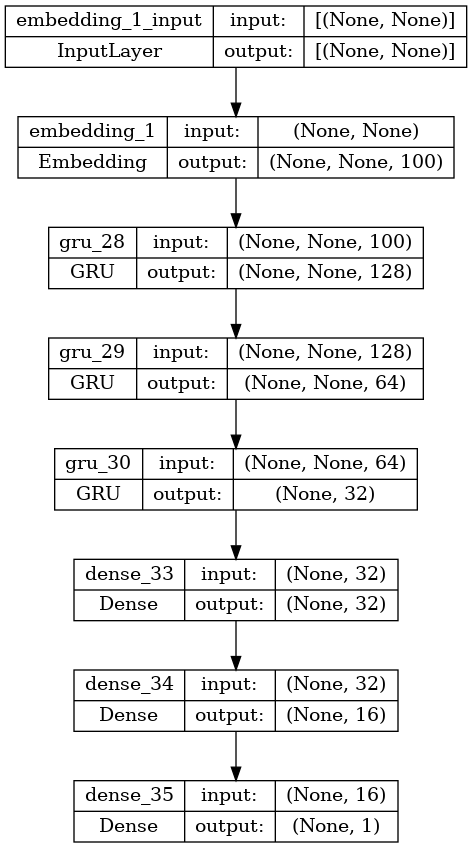

In [229]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)

from keras.utils import plot_model

plot_model(rnn, "rnn_model.png", show_shapes=True)

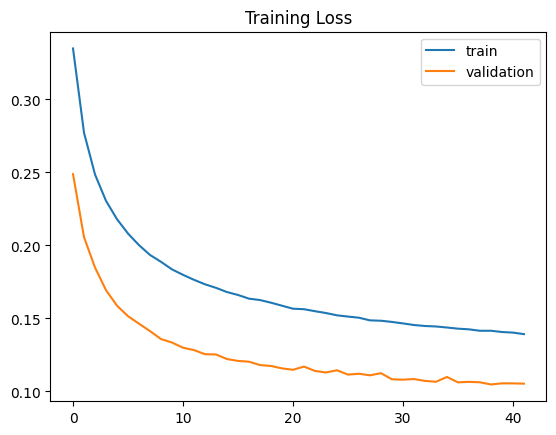

In [238]:
# Plot loss graph
import matplotlib.pyplot as plt

plt.title('Training Loss')
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right')

plt.savefig('./rnn_model_loss.png')